# **특성 공학(Feature Engineering)**

- 기존의 특성을 사용해 새로운 특성을 뽑아내는 것
- 특성이 1개일 때 선형 회귀 모델이 학습하는 것 : 직선
- 특성이 2개일 때 선형 회귀 모델이 학습하는 것 : 평면
- 특성이 3개일 경우는 인간이 상상할 수 없는 모습

<br>

---

<br>

## **농어의 무게 예측 실습**

- 특성 : 길이, 높이, 두께
- 특성이 많은 고차원이므로 다중 회귀
- PolynomialFeatures 클래스 사용

In [2]:
# 데이터 준비하기
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [3]:
# 타깃 데이터 가져오기
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [4]:
# 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## **PolynomialFeatures**

- 2개의 특성([2,3])을 가진 샘플을 변환하면 [1. 2. 3. 4. 6. 9.]로 변환된다
- PolynomialFeatures는 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가한다
- 1은 선형 방정식의 절편이 항상 1인 특성과 곱해이는 계수이기 때문에 나타난다
- 사이킷런의 선형 모델은 자동으로 절편을 추가하지만 또한 모델은 자동으로 절편된 항을 무시하기 때문에 굳이 수동으로 없애지 않아도 된다
  - 없애고 싶다면 인자로 include_bias=False를 사용

In [5]:
# PolynomialFeatures 클래스는 변환기이므로 fit(), transform() 메소드 제공
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [6]:
# 실제 모델에 사용할 데이터를 변환
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 10)


In [7]:
# 테스트 데이터도 변환
test_poly = poly.transform(test_input)

In [8]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
# 학습 데이터 점수 확인
print(lr.score(train_poly, train_target))

0.9903183436982125


In [9]:
# 테스트 데이터 점수 확인
print(lr.score(test_poly, test_target))

0.971455991159412


In [10]:
# 차원의 수(특성의 수)를 늘리고 싶다면 degree= 인자로 지정해주면 된다
# 하지만 과도한 특성 크기는 오히려 과적합 문제를 발생시킬 수 있다
poly = PolynomialFeatures(degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [11]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999999998


In [12]:
# 학습 데이터의 점수는 매우 높지만 테스트 데이터는 그렇지 못함 -> 과대적합
print(lr.score(test_poly, test_target))

-144.40488780428055


## **규제(Regualrization)**

- 머신 러닝 모델이 너무 과도하게 학습하지 못하도록 규제를 하는 것
- 과대적합되지 않도록 하는 방법은 여러가지
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것
  - 특성의 스케일이 정규화되지 않으면 곱해지는 계수의 차이도 클 것!
  - 정규화로 먼저 스케일링을 진행해야함

<br>

#**1. Ridge**

- 계수를 제곱한 값을 기준으로 규제를 적용하여 계수의 크기를 줄임
- sklearn.linear_model 패키지에 속함

# **2. Lasso**

- 계수의 절댓값을 기준으로 규제를 적용하여 계수의 크기를 줄임
- 하지만 계수를 아예 0으로 만들 수 있기 때문에 보통 ridge를 더 많이 쓰는 추세
- sklearn.linear_model 패키지에 속함

  - 두 규제 모두 alpha=인자를 가짐
  - alpha는 규제의 양을 조절하는 것으로 하이퍼파라미터 즉, 사람이 지정하는 값이다
  - alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해진다 -> 과대적합될 가능성이 큼
  - 적절한 alpha값을 찾는 법 -> R2값의 그래프를 그려보는 것!
    - 훈련 세트와 테스트 세트의 점수가 가장 가가운 지점이 최적의 alpha

In [13]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [14]:
# Ridge
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [15]:
# 과적합 문제 해결
print(ridge.score(test_scaled, test_target))

0.9790693977615387


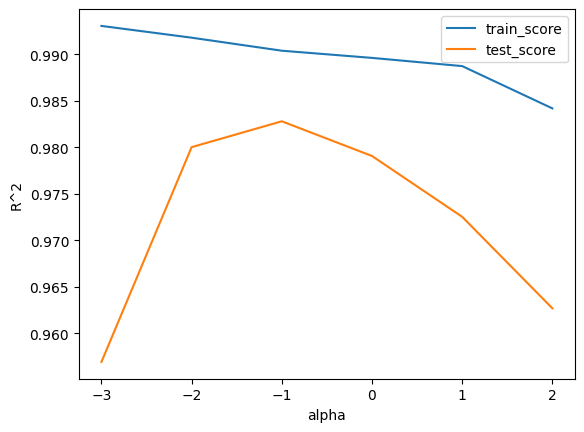

In [18]:
# R2 그래프로 최적의 alpha값 찾기
import matplotlib.pyplot as plt

train_score = []
test_score = []

# 0.001에서 10배씩 올려가며 확인
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# alpha_list의 6개 값을 동일한 간격으로 나타내기 위해 log함수로 바꾸어 표현
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [19]:
# 가장 적합한 alpha값은 -1, 즉 0.1이다
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
# 훈련 세트와 테스트 세트의 점수가 비슷해짐
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386931


In [20]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


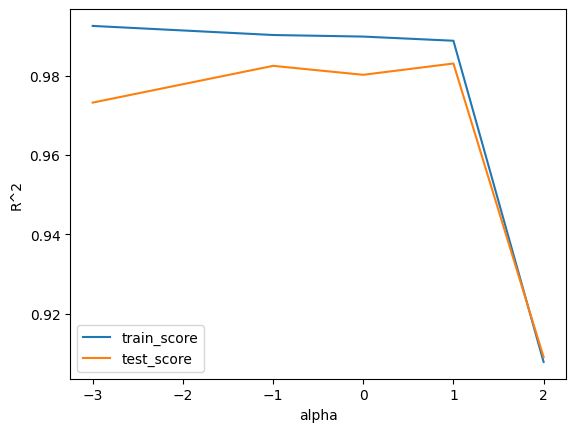

In [24]:
# Lasso 모델 최적의 alpha값 찾기
train_score = []
test_score = []
alpha_list = [0.001, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

# 시각화
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [25]:
# Lasso 모델 최적의 alpha값은 1, 즉 10이다
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [26]:
# Lasso의 0인 계수 확인
print(np.sum(lasso.coef_ == 0))

41
